# World's largest islands

This dataset `largest-islands.csv` contains information about the 100 largest islands in the world. The unit for the `area` column is km2.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'largest-islands.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('largest-islands.csv')
df # Display the DataFrame

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36
...,...,...,...,...,...,...
95,Oceania,Guadalcanal,5302,Solomon Islands,tropics,100
96,South America,East Falkland,6605,Argentina,temperate,89
97,South America,Chiloe,8394,Chile,temperate,81
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


### Project Ideas

- What are the 10 largest islands in the tropics?

- What are the largest islands in each `region`?

- Create a line graph with `area` on the y-axis and `rank` on the x-axis. The data should be ordered by `rank`, from largest to smallest.

- What islands are composed of multiple countries?
	- Hint: try `countries.str.contains(",")`

In [15]:
# YOUR CODE HERE (add more cells as needed)
# OPcion 1 Display the 10 largest island in the tropics
tropical_islands = df.query("climate == 'tropics'").nlargest(10, 'area')
tropical_islands

,region,island,area,countries,climate,rank
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
28,Asia,Sumatra,480793,Indonesia,tropics,6
22,Asia,Sulawesi,188522,Indonesia,tropics,11
21,Asia,Java,129438,Indonesia,tropics,13
80,North America,Cuba,109884,Cuba,tropics,16
26,Asia,Luzon,104688,Philippines,tropics,17
14,Asia,Mindanao,94630,Philippines,tropics,19
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23


In [12]:
# Opcion 2 de responder la pregunta 1 
tropical_islands2 = df[df['climate'] == 'tropics'].sort_values('area', ascending=False).head(10)
# Display the 10 largest islands in the tropics
tropical_islands2

,region,island,area,countries,climate,rank
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
28,Asia,Sumatra,480793,Indonesia,tropics,6
22,Asia,Sulawesi,188522,Indonesia,tropics,11
21,Asia,Java,129438,Indonesia,tropics,13
80,North America,Cuba,109884,Cuba,tropics,16
26,Asia,Luzon,104688,Philippines,tropics,17
14,Asia,Mindanao,94630,Philippines,tropics,19
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23


In [27]:
# What are the largest islands in each `region`?
largest_islands_by_region = df.loc[df.groupby('region')['area'].idxmax()]
# Display the largest island in each region
largest_islands_by_region

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
35,Eurasia,Sakhalin,76400,Russia,temperate,22
41,Europe,Greenland,2166086,Denmark,polar,1
75,North America,Baffin Island,507451,Canada,polar,5
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


In [35]:
# Opcion 2 # What are the largest islands in each `region`?
largest_islands_by_region2 = df.groupby('region').apply(lambda group: group.nlargest(1, 'area'))

# Display the largest island in each region
largest_islands_by_region2


/var/folders/85/4z9cvl4j0dn97j34zh3zmnth0000gn/T/ipykernel_227/2420304279.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  largest_islands_by_region2 = df.groupby('region').apply(lambda group: group.nlargest(1, 'area'))


,,region,island,area,countries,climate,rank
region,,,,,,,
Africa,0,Africa,Madagascar,591896,Madagascar,tropics,4
Antarctic,1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
Asia,23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
Eurasia,35,Eurasia,Sakhalin,76400,Russia,temperate,22
Europe,41,Europe,Greenland,2166086,Denmark,polar,1
North America,75,North America,Baffin Island,507451,Canada,polar,5
Oceania,86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
South America,98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


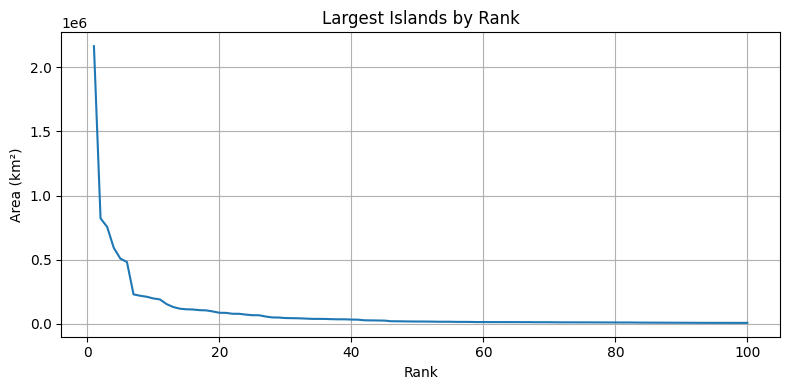

In [51]:
# Create a line graph with `area` on the y-axis and `rank` on the x-axis. 
# The data should be ordered by `rank`, from largest to smallest.

# Sort the DataFrame by 'rank' and plot the area against rank
island_graph = df.sort_values('rank', ascending=True)

# Create a line graph
plt.figure(figsize=(8, 4))


# Set the title and labels
plt.title('Largest Islands by Rank')

# Set the x and y labels names
plt.xlabel('Rank')
plt.ylabel('Area (km²)')

# Plot the data 
plt.grid(True)
plt.plot(island_graph['rank'], island_graph['area'])

plt.tight_layout()
# Show the plot
plt.show()

In [53]:
# What islands are composed of multiple countries?
# Hint: try `countries.str.contains(",")`
multi_country_islands = df[df['countries'].str.contains(",")]
multi_country_islands

,region,island,area,countries,climate,rank
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
45,Europe,Ireland,84421,"Ireland, United Kingdom",temperate,20
50,Europe,Cyprus,9251,"Cyprus, United Kingdom",temperate,76
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


0     False
1      True
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Name: countries, Length: 100, dtype: bool